# Linear Regression Assignment

## Bike Sharing Case Study

### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

Essentially, the company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Business Goal:
- Develop a model to find the variables which are significant for the demand of shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

### Step 1: Importing Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Read the data from csv file

bikesharing = pd.read_csv('day.csv')

In [4]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bikesharing.shape

(730, 16)

In [6]:
#Print null counts by column
bikesharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Cleaning and Quality Checking of Data

In [9]:
# Percentage of missing values in each column
round(100*(bikesharing.isnull().sum()/len(bikesharing)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [10]:
bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
# Dropping the unwanted columns
# 'instant' has only index for the row,
# 'dteday' has date which can be compensated by 'year' and 'month' column,
# 'casual' and 'registered' seems to be the breakup by category for 'cnt' column.

bikesharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [12]:
bikesharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### 2.1  Mapping of season, month, weekday and weather columns

In [13]:
bikesharing.season = bikesharing.season.map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})

bikesharing.mnth = bikesharing.mnth.map({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

bikesharing.weathersit = bikesharing.weathersit.map({1:'Clear',2:'Misty',3:'Light_Snow',4:'Heavy_Rain'})

bikesharing.weekday = bikesharing.weekday.map({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})

### Step 3: Visualising the Data
Let's now spend some time doing what is arguably the most important step - **understanding the data**.

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.

#### 3.1 Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

<Figure size 2000x1500 with 0 Axes>

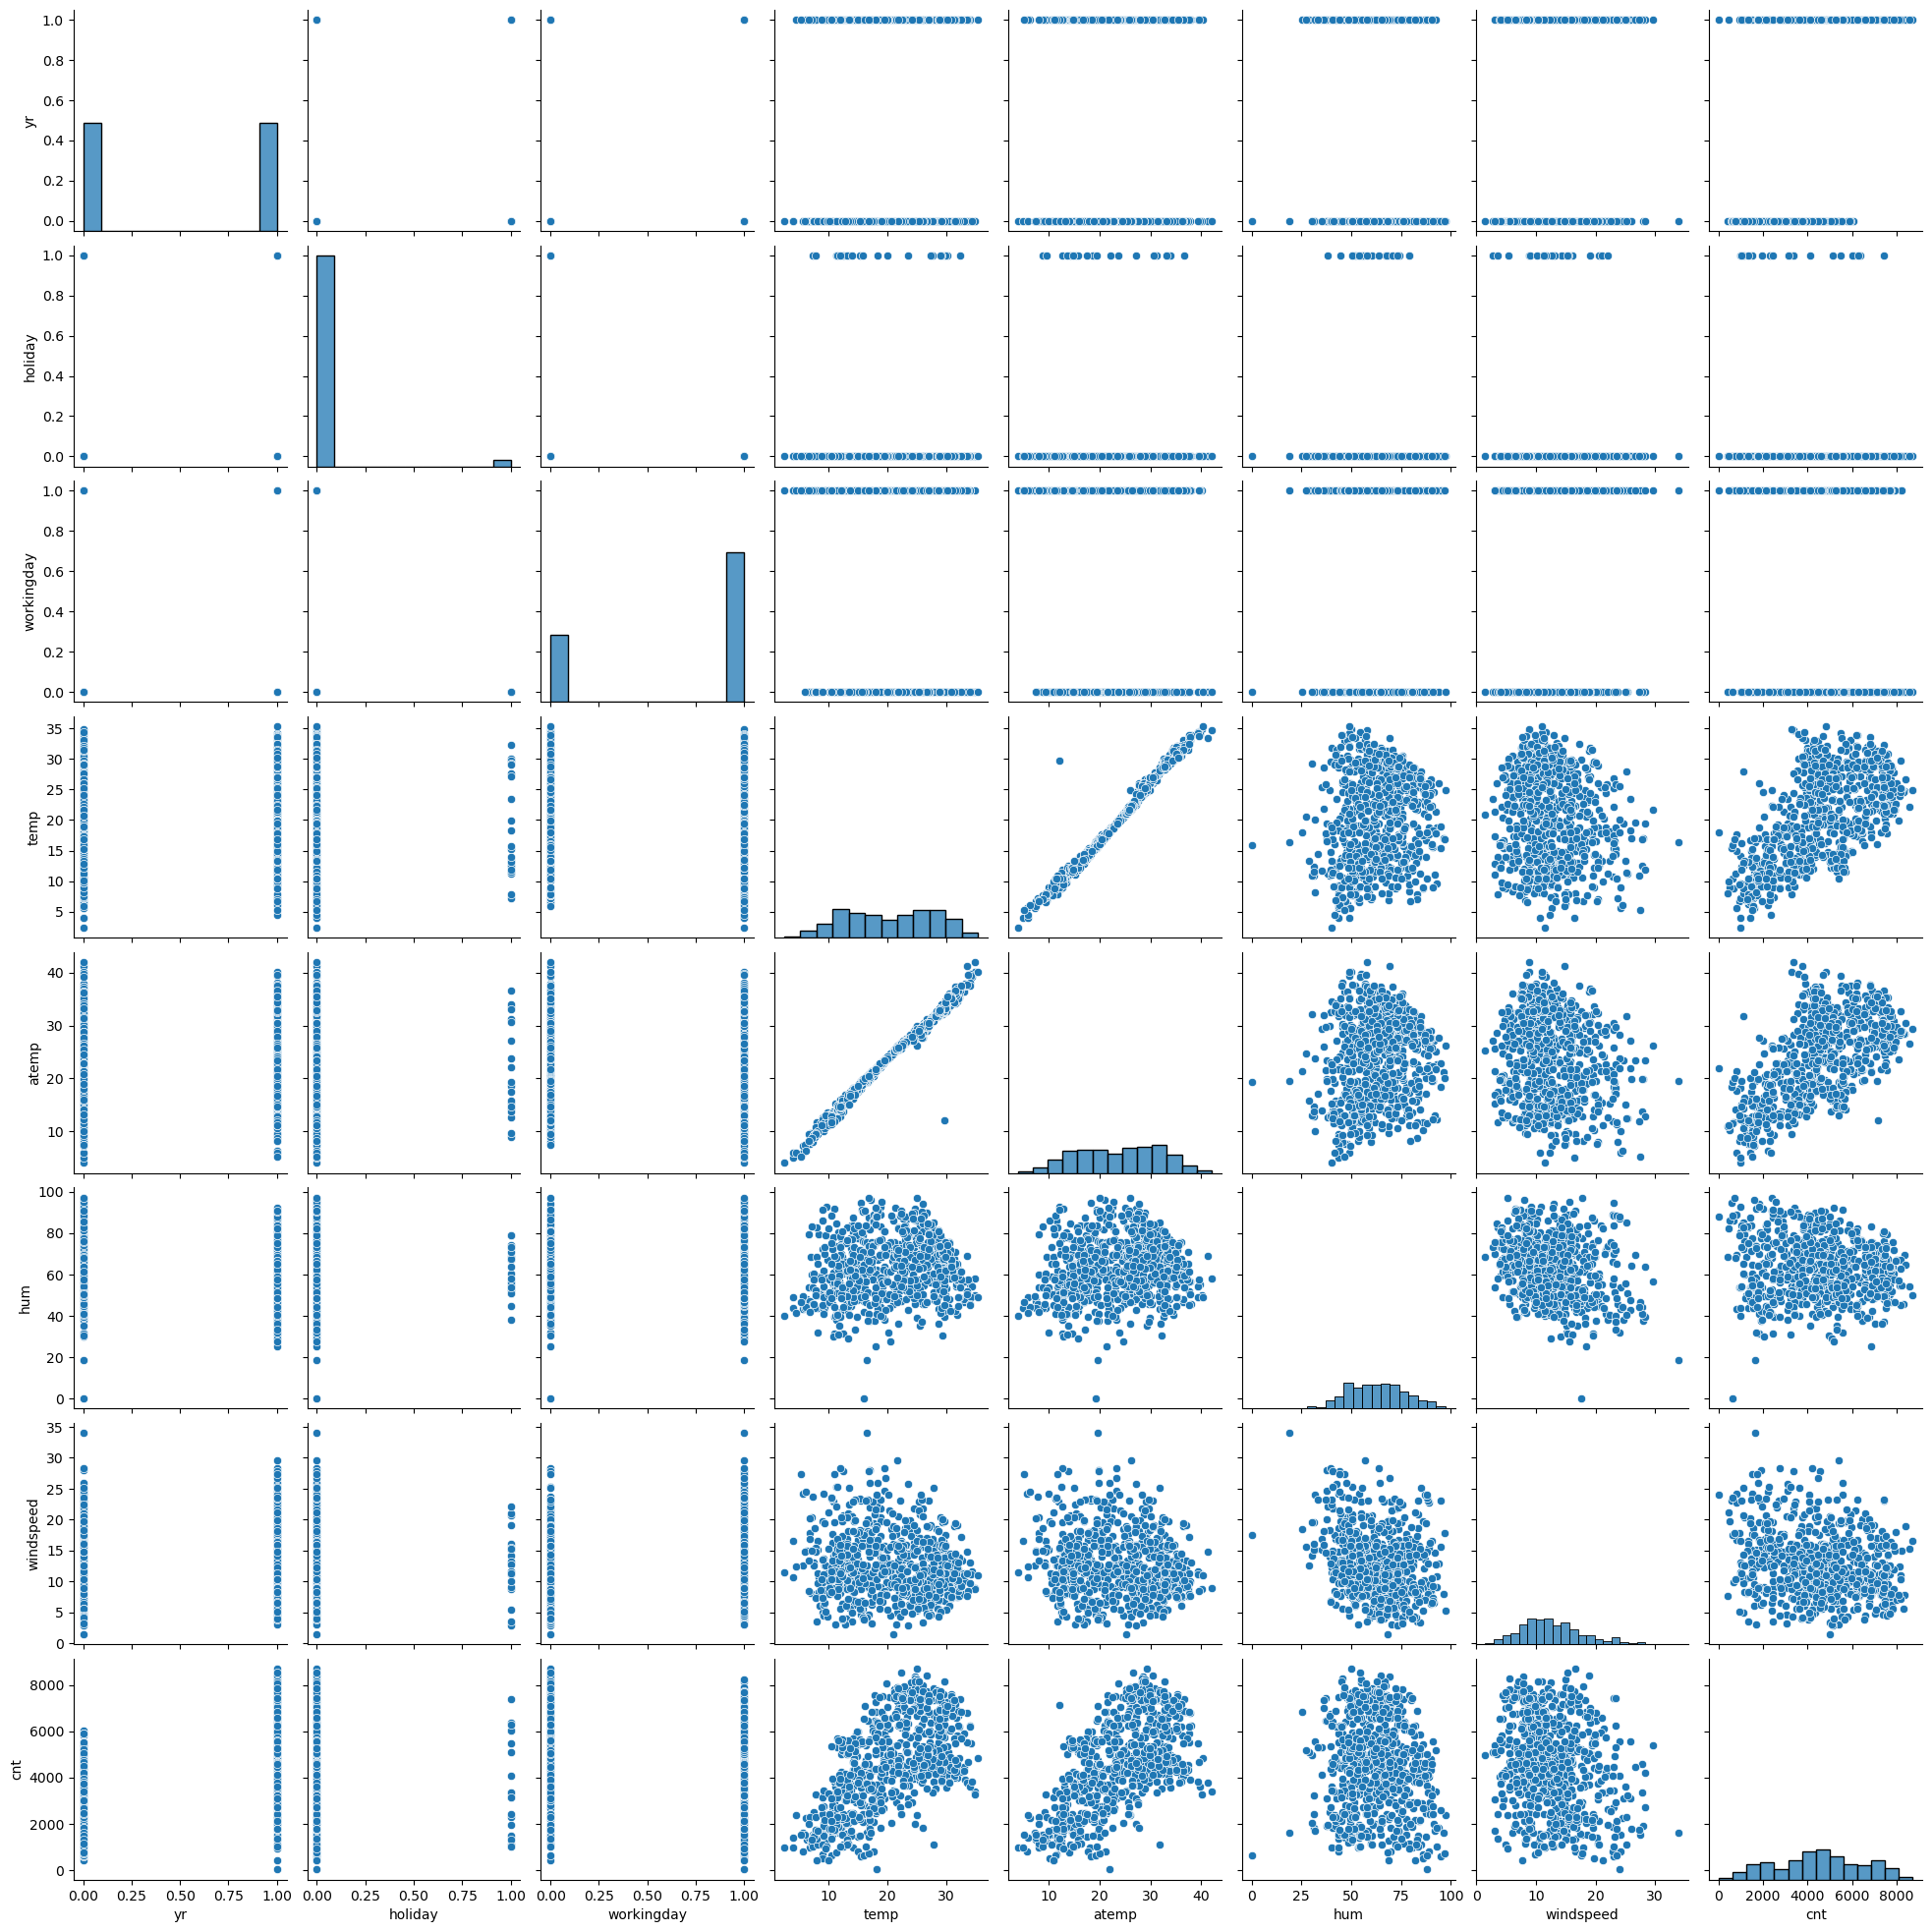

In [14]:
plt.figure(figsize=(20,15))
sns.pairplot(bikesharing)
plt.show()

<Figure size 1500x3000 with 0 Axes>

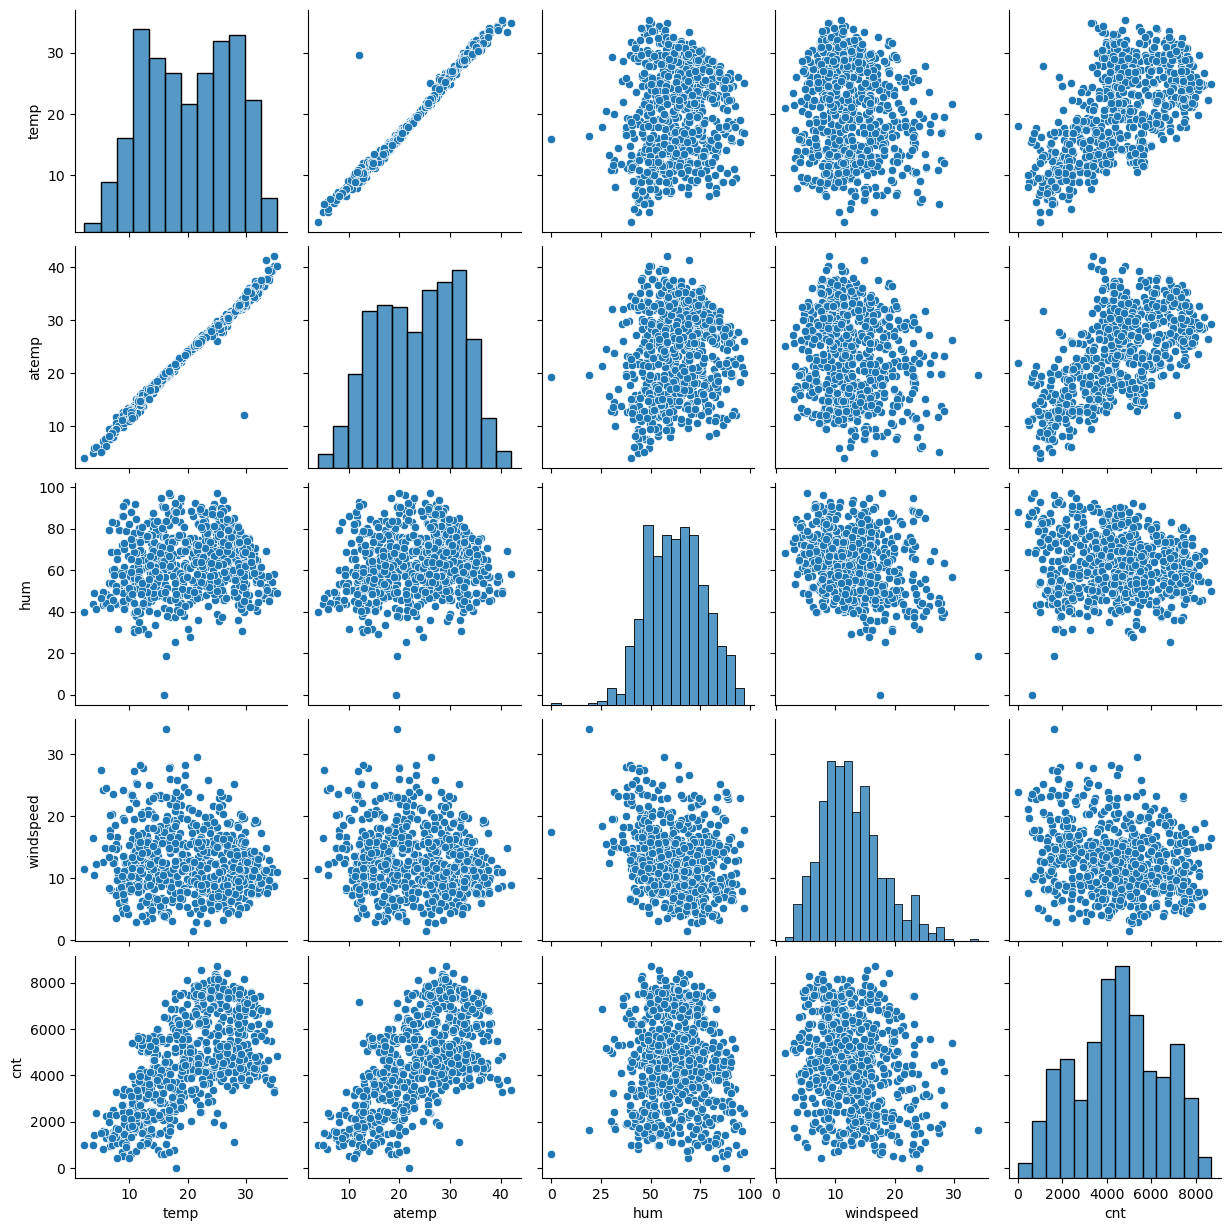

In [15]:
#Draw pairplots for continuous numeric variables
plt.figure(figsize = (15,30))
sns.pairplot(data=bikesharing,vars=['temp', 'atemp', 'hum','windspeed', 'cnt'])
plt.show()

#### Inference:
- Looks like the temp and atemp has the highest corelation with the target variable cnt

#### 3.2 Visualising Categorical Variables
Let's make boxplot of all the categorical variables

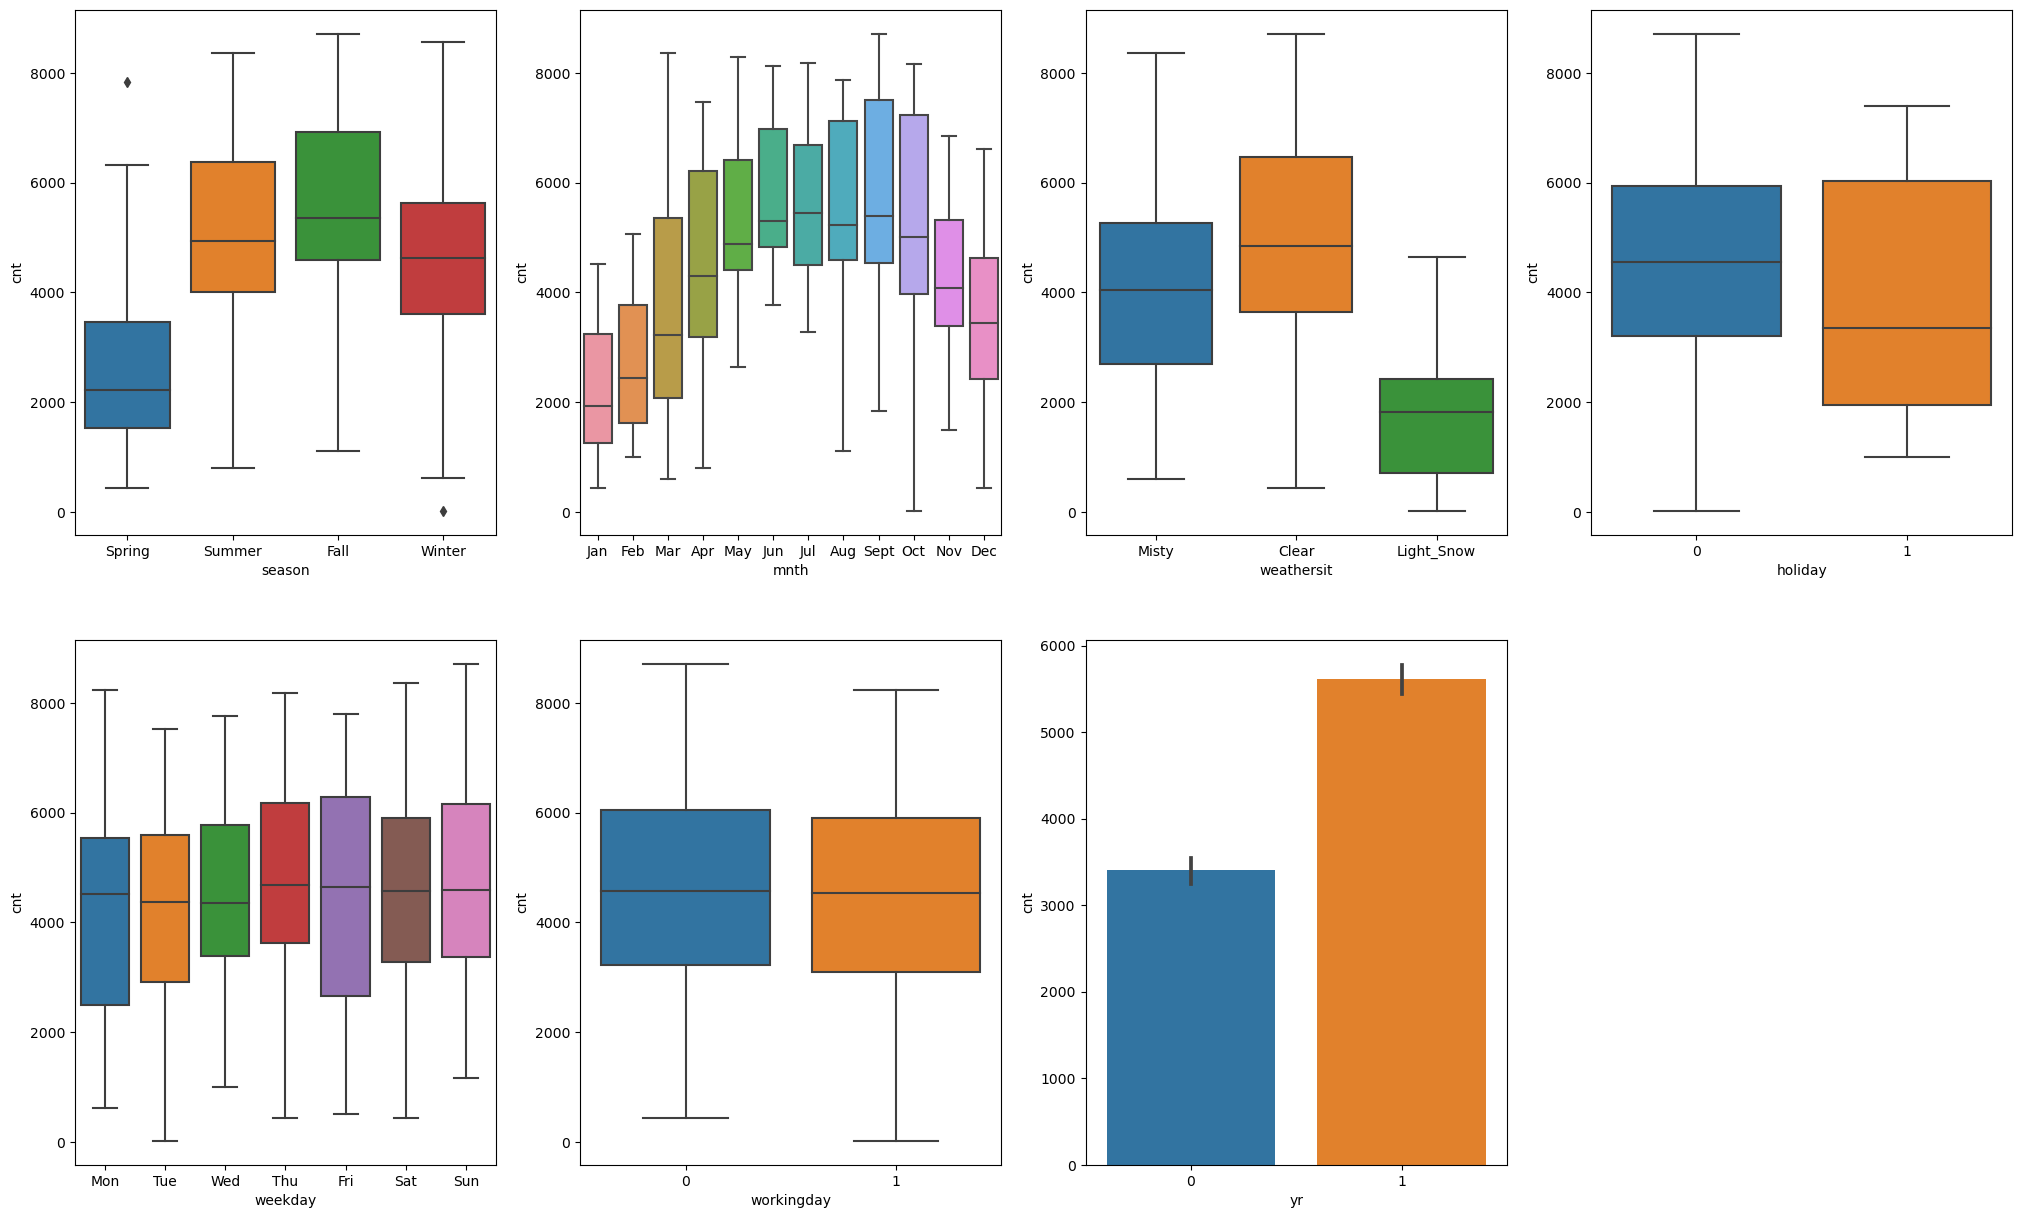

In [16]:
plt.figure(figsize=(25, 15))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)

plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)

plt.subplot(2,4,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)

plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)

plt.subplot(2,4,7)
sns.barplot(x = 'yr', y = 'cnt', data = bikesharing)

plt.show()

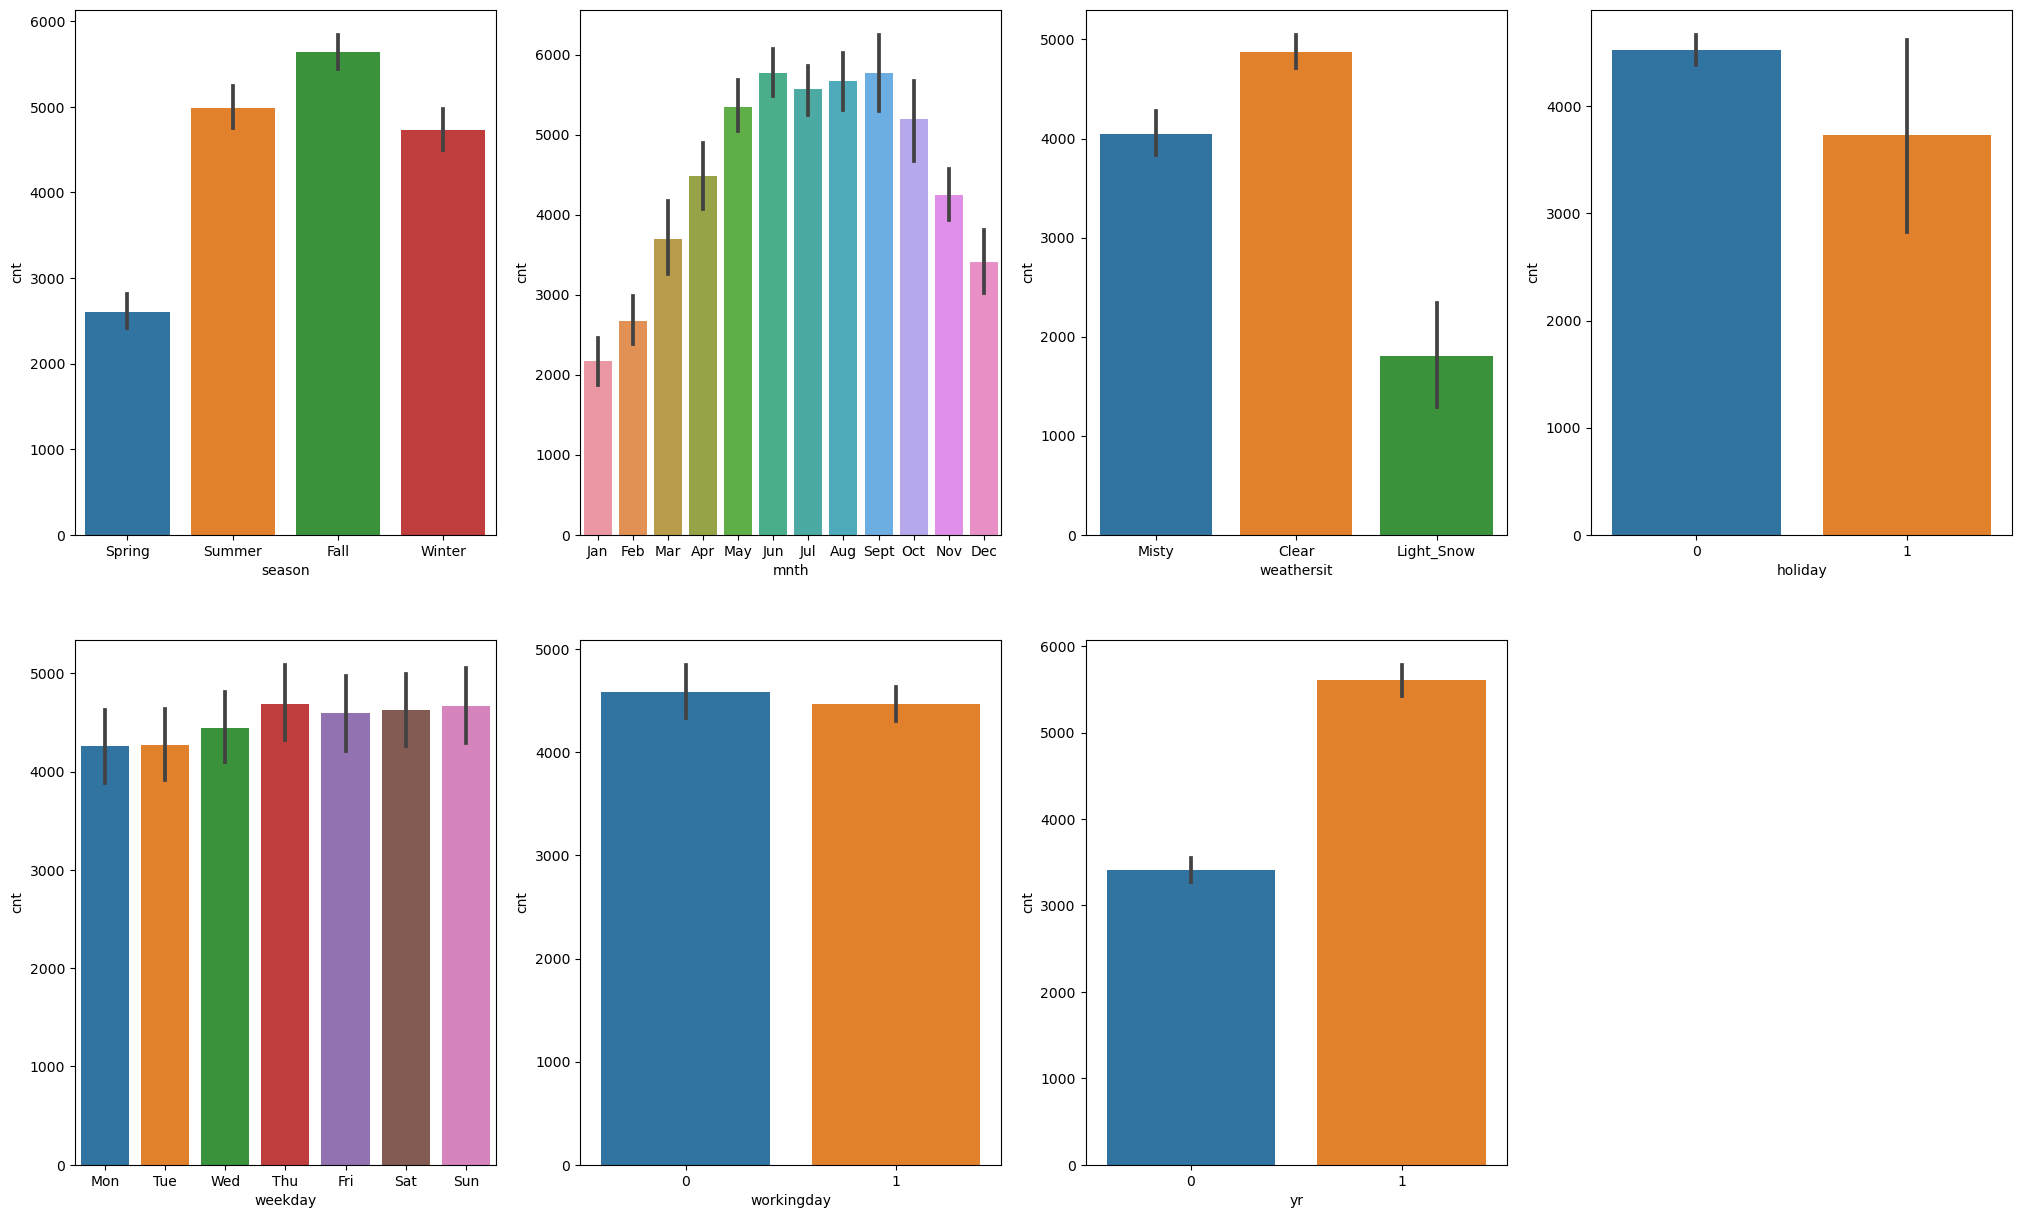

In [17]:
plt.figure(figsize=(25, 15))

plt.subplot(2,4,1)
sns.barplot(x = 'season', y = 'cnt', data = bikesharing)

plt.subplot(2,4,2)
sns.barplot(x = 'mnth', y = 'cnt', data = bikesharing)

plt.subplot(2,4,3)
sns.barplot(x = 'weathersit', y = 'cnt', data = bikesharing)

plt.subplot(2,4,4)
sns.barplot(x = 'holiday', y = 'cnt', data = bikesharing)

plt.subplot(2,4,5)
sns.barplot(x = 'weekday', y = 'cnt', data = bikesharing)

plt.subplot(2,4,6)
sns.barplot(x = 'workingday', y = 'cnt', data = bikesharing)

plt.subplot(2,4,7)
sns.barplot(x = 'yr', y = 'cnt', data = bikesharing)

plt.show()

#### Inference:
- Fall season have attracted the highest bookings.
- Most of the bookings has been done during the month of May, June, July, August, September and October. Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. 
- On clear weather days, the demand is highest.
- When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.
- Thursday, Friday, Saturday and Sunday have more number of bookings as compared to the start of the week.
- Booking seemed to be almost equal either on working day or non-working day. 
- 2019 attracted more number of bookings than 2018.

#### 3.3 Visualising Continuous Variables Relationship
Let's make heatmap of all the continuous variables

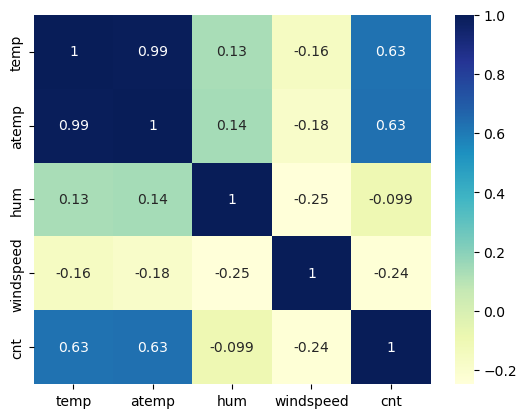

In [18]:
# Checking continuous variables relationship with each other
cor=bikesharing[['temp', 'atemp', 'hum','windspeed', 'cnt']].corr()
sns.heatmap(cor, cmap='YlGnBu', annot = True)
plt.show()

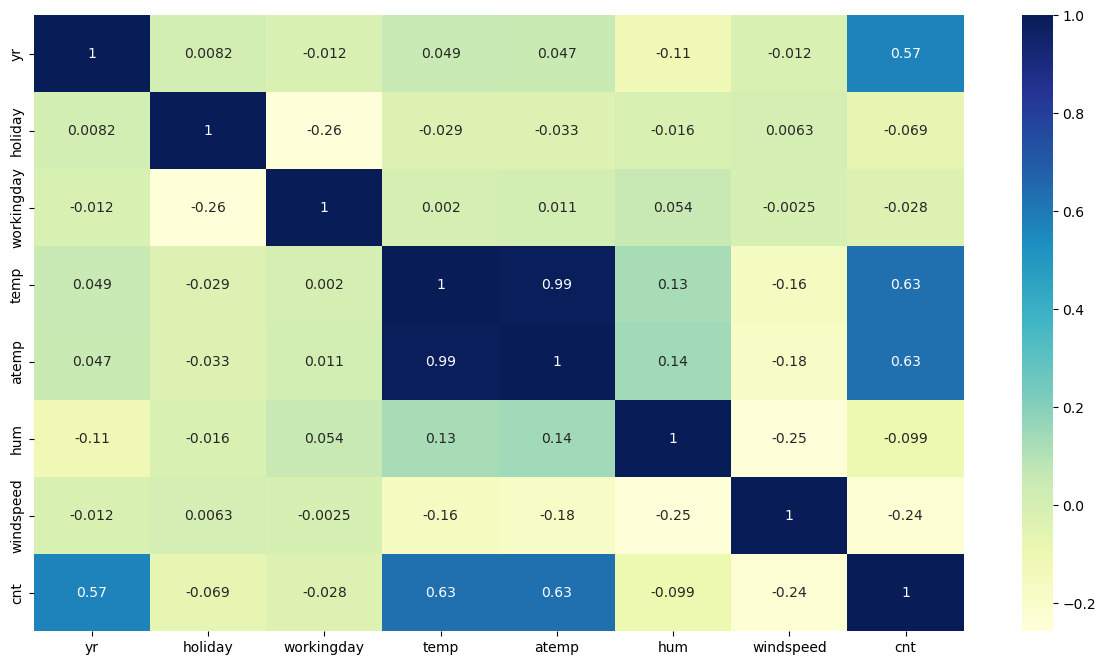

In [19]:
cor=bikesharing.corr()
plt.figure(figsize = (15,8))
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

#### Inference:
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We will use this heatmap while building the linear model so as to validate different correlated values for identifying the correct variable to select/eliminate from the model.

### Step 4: Data Preparation for Linear Regression
#### 4.1 Create dummy variables for all categorical variables

In [20]:
bikesharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [21]:
bikesharing = pd.get_dummies(data=bikesharing,columns=["season","mnth","weekday"],drop_first=True)
bikesharing = pd.get_dummies(data=bikesharing,columns=["weathersit"])

In [22]:
bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear', 'weathersit_Light_Snow',
       'weathersit_Misty'],
      dtype='object')

In [23]:
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


#### 4.2 Splitting the Data into Training and Testing Sets

In [24]:
# Importing Libraries required for building model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [25]:
bikesharing.shape

(730, 31)

In [26]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
print(df_train.shape)
print(df_test.shape)

(510, 31)
(219, 31)


In [28]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,1,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [29]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,1,0,0,1,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,1,0,0,0,0,1,0,0


#### 4.3 Rescaling the Features
##### 4.3.1. Min-Max scaling

In [30]:
scaler = MinMaxScaler()

# Scaling continuous variables
num_vars=['temp', 'atemp','hum','windspeed','cnt']

# Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [31]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,1,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [32]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.627451,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


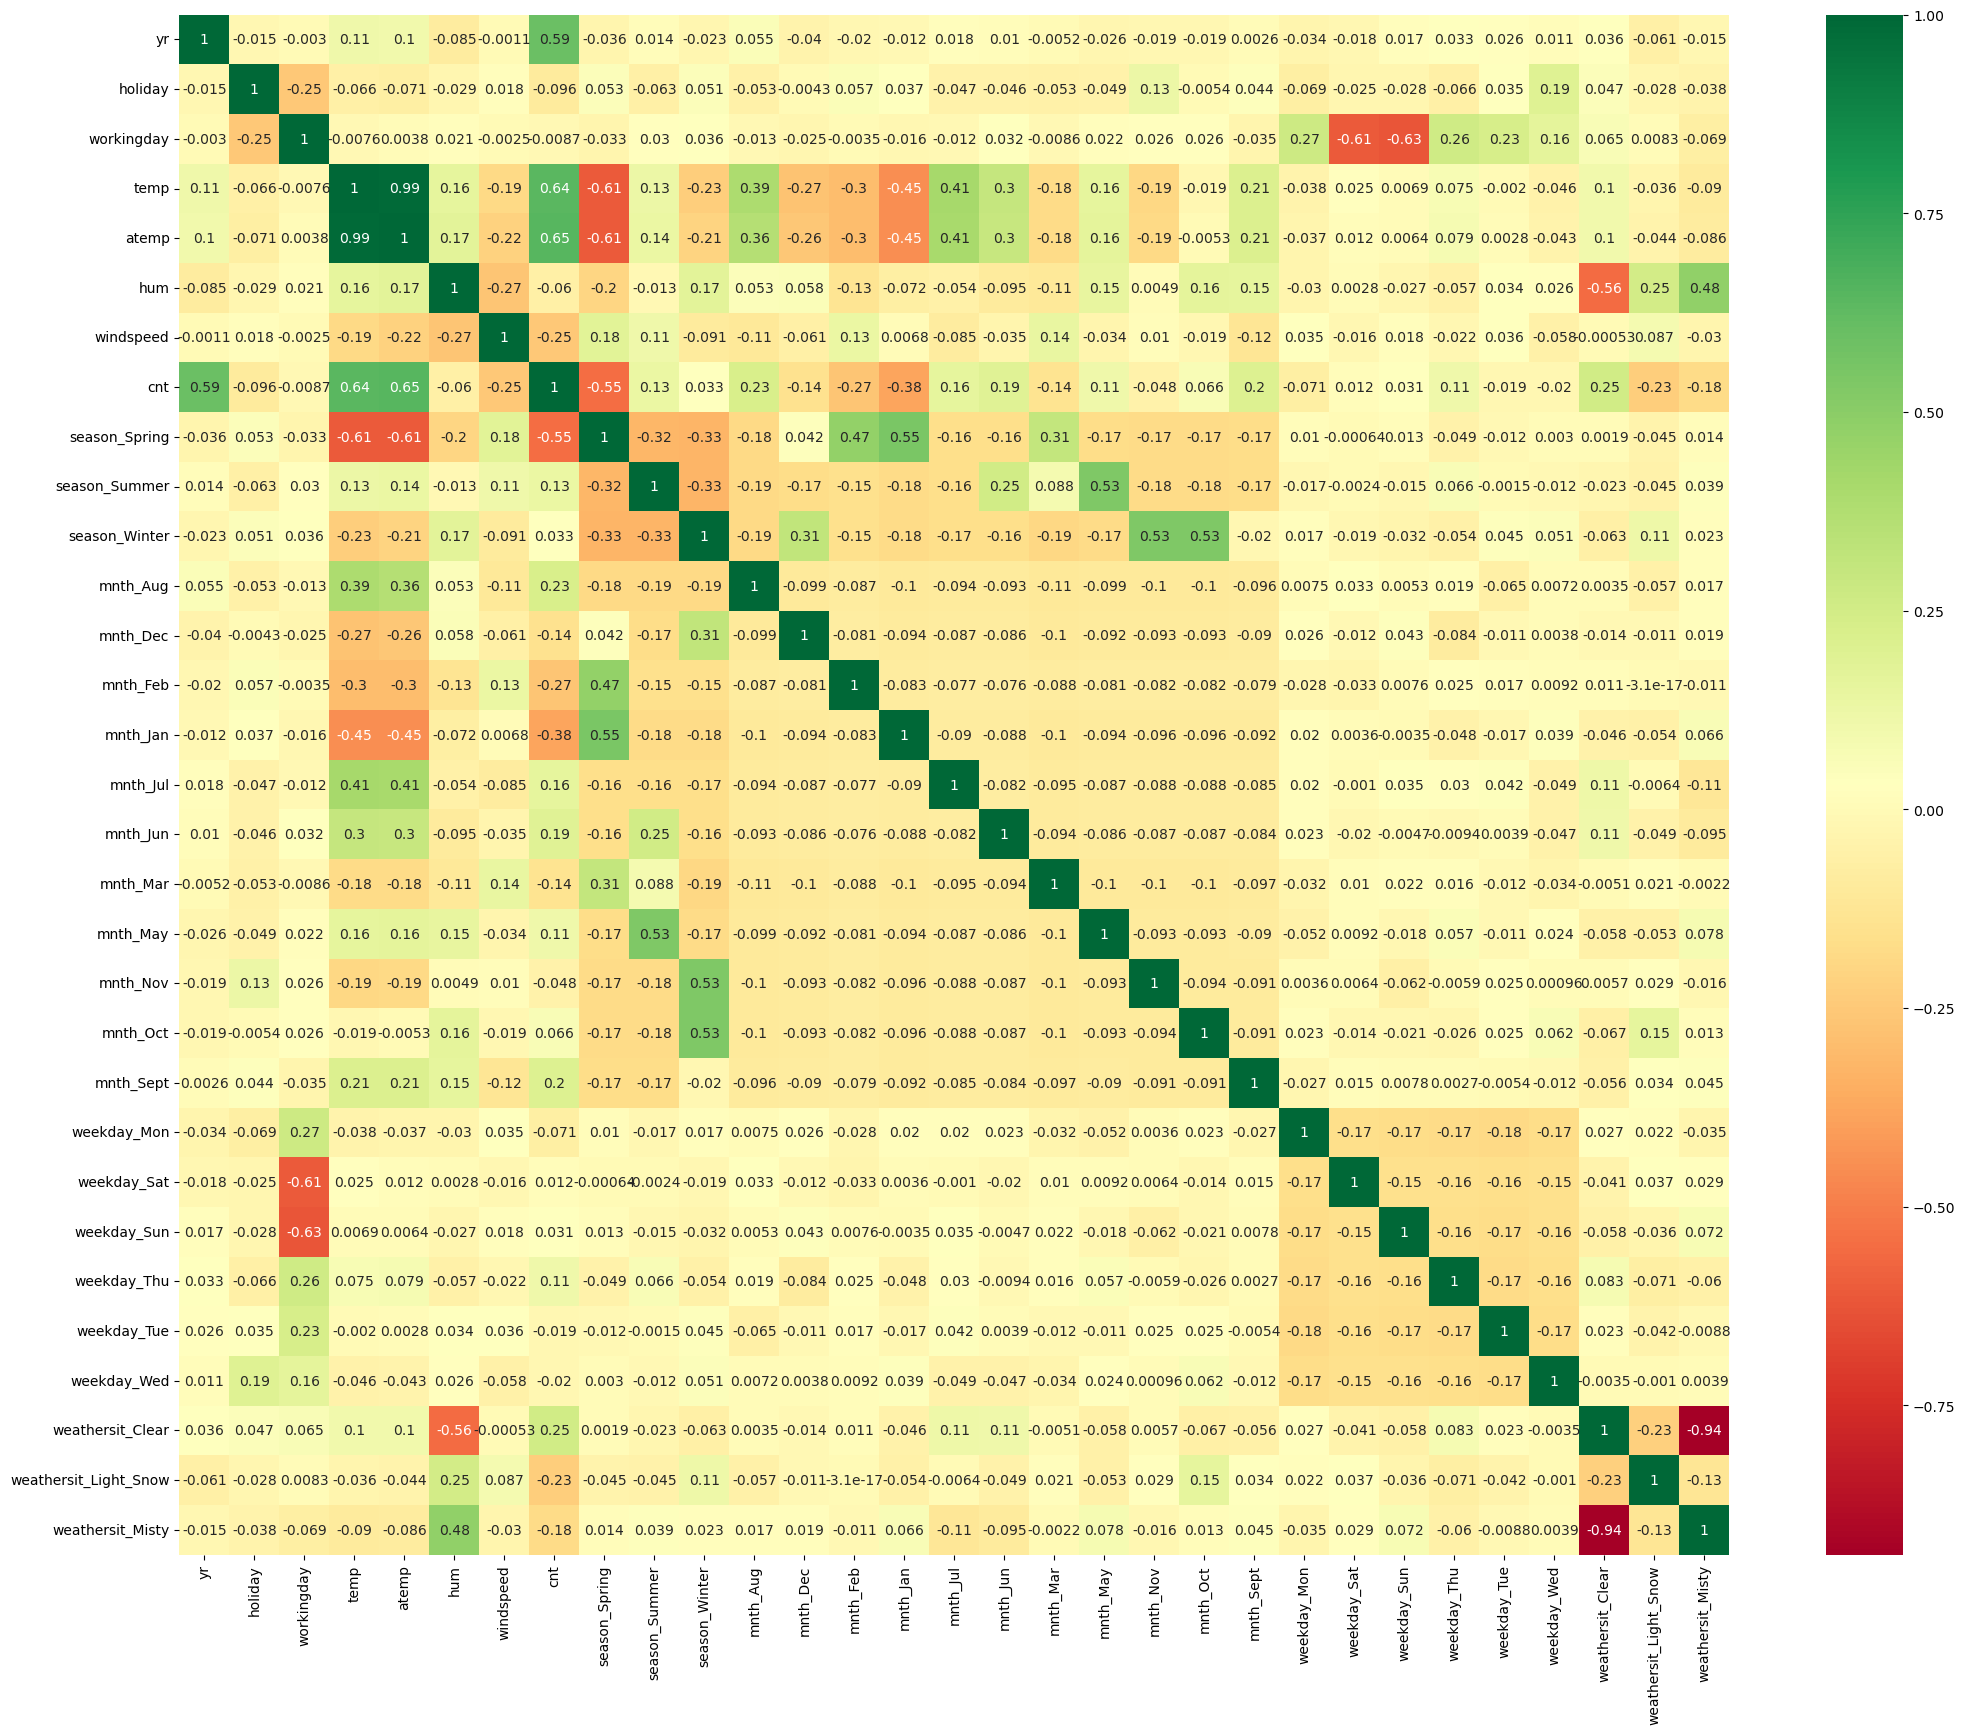

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

#### Inference:
- 'cnt' seems to have correlation with 'atemp' and 'temp'.
- 'atemp' seems to have very good correlation with 'temp'.

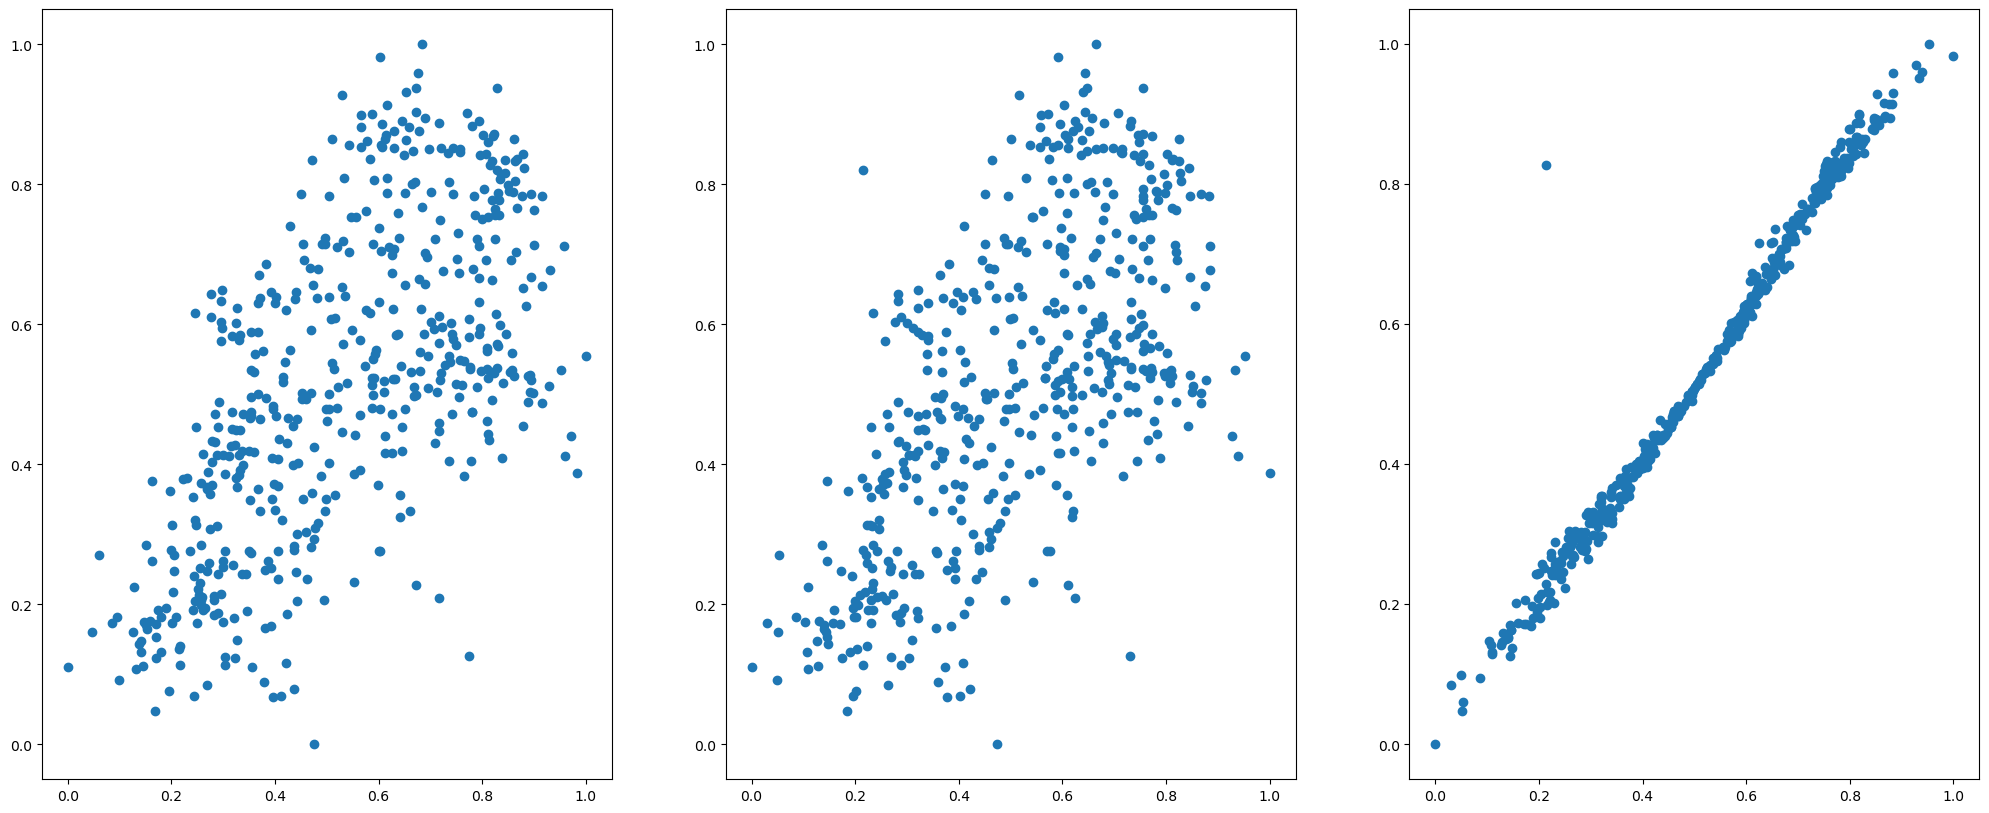

In [34]:
# Visualizing the correlations to see the trends via Scatter plot.
plt.figure(figsize=(25, 10))

plt.subplot(1,3,1)
plt.scatter(df_train.temp, df_train.cnt)

plt.subplot(1,3,2)
plt.scatter(df_train.atemp, df_train.cnt)

plt.subplot(1,3,3)
plt.scatter(df_train.atemp, df_train.temp)

#### 4.4 Dividing into X and Y sets for the model building

In [35]:
# CREATING X_train AND y_train

y_train = df_train.pop('cnt')
X_train = df_train

### Step 5: Building Linear Models
#### 5.1 Recursive Feature Elimination (RFE)

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [37]:
rfe = RFE(lm, step=10)
rfe = rfe.fit(X_train, y_train)

In [38]:
# List of variables selected in top 10 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 3),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 3),
 ('mnth_Mar', False, 3),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 2),
 ('mnth_Sept', False, 3),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', False, 2),
 ('weekday_Sun', False, 2),
 ('weekday_Thu', False, 2),
 ('weekday_Tue', False, 3),
 ('weekday_Wed', False, 3),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Misty', False, 2)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'weathersit_Clear', 'weathersit_Light_Snow'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['season_Summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Misty'],
      dtype='object')

#### 5.2 Building Model using STATSMODEL

In [41]:
X_train_rfe = X_train[col]
X_train_rfe

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,weathersit_Clear,weathersit_Light_Snow
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,1,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,0,0,0,0,0,0,0,0
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0,0,0,0,0,0,1,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,1,0,0,0,0,0,1,0
350,0,0,1,0.248216,0.223544,0.577930,0.431816,0,1,1,0,0,0,0,0


In [42]:
# Creating dataframe with RFE selected variables
X_train_lm1 = sm.add_constant(X_train_rfe)

# Running the linear model 1
lm1 = sm.OLS(y_train,X_train_lm1.astype(float)).fit()

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.9
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          5.56e-186
Time:                        22:36:36   Log-Likelihood:                 507.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     494   BIC:                            -914.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3157      0.036      8.694      0.000       0.244       0.387
yr                        0.2309      0.008     28.180      0.000       0.215       0.247
holiday                  -0.0989      0.027     -3.682      0.000      -0.152      -0.046
workingday               -0.0207      0.009     -2.227      0.026      -0.039      -0.002
temp                      0.3530      0.130      2.712      0.007       0.097       0.609
atemp                     0.0993      0.137      0.726      0.468      -0.169       0.368
hum                      -0.1368      0.038     -3.575      0.000      -0.212      -0.062
windspeed                -0.1834      0.026     -6.970      0.000      -0.235      -0.132
season_Spring            -0.1039      0.016     -6.679      0.000      -0.134      -0.073
season_Winter             0.0745      0.014      5.213      0.000       0.046       0.103
mnth_Dec                 -0.0515      0.017     -2.960      0.003      -0.086      -0.017
mnth_Jan                 -0.0500      0.018     -2.743      0.006      -0.086      -0.014
mnth_Jul                 -0.0831      0.017     -4.848      0.000      -0.117      -0.049
mnth_Nov                 -0.0548      0.019     -2.937      0.003      -0.091      -0.018
weathersit_Clear          0.0595      0.011      5.570      0.000       0.039       0.081
weathersit_Light_Snow    -0.1929      0.025     -7.602      0.000      -0.243      -0.143
==============================================================================
Omnibus:                       75.307   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.633
Skew:                          -0.753   Prob(JB):                     1.09e-41
Kurtosis:                       5.571   Cond. No.                         86.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,81.23
4,temp,53.16
5,atemp,51.89
8,season_Spring,2.74
9,season_Winter,2.36
6,hum,1.92
13,mnth_Nov,1.69
11,mnth_Jan,1.65
14,weathersit_Clear,1.65
10,mnth_Dec,1.44


In [44]:
# We can drop 'atemp' variable as it has high p-value

X_train_new = X_train_lm1.drop(['atemp'], axis = 1)

X_train_lm2 = sm.add_constant(X_train_new)

# Running the linear model 2
lm_train = sm.OLS(y_train,X_train_lm2).fit()

print(lm_train.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.4
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          5.20e-187
Time:                        22:36:36   Log-Likelihood:                 506.75
No. Observations:                 510   AIC:                            -983.5
Df Residuals:                     495   BIC:                            -920.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

In [45]:
vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,81.05
4,temp,3.44
7,season_Spring,2.74
8,season_Winter,2.34
5,hum,1.91
12,mnth_Nov,1.69
10,mnth_Jan,1.64
13,weathersit_Clear,1.64
9,mnth_Dec,1.44
11,mnth_Jul,1.28


#### Inference:
- We can cosider the above model i.e 'lm_train', as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
- F-Statistics value of 186.4 (which is greater than 1) and the p-value of 5.20e-187 i.e almost equals to zero, states that the overall model is significant

### Step 6: Residual Analysis of the train data

In [46]:
X_train_lm2

,const,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,weathersit_Clear,weathersit_Light_Snow
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,1,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,1,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0
728,1.0,1,0,1,0.245101,0.498067,0.663106,1,0,1,0,0,0,1,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.605840,0.355596,0,0,0,0,0,0,0,0
578,1.0,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,1,0
53,1.0,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,1,0
350,1.0,0,0,1,0.248216,0.577930,0.431816,0,1,1,0,0,0,0,0


In [47]:
y_train_pred = lm_train.predict(X_train_lm2)

Text(0.5, 0, 'Errors')

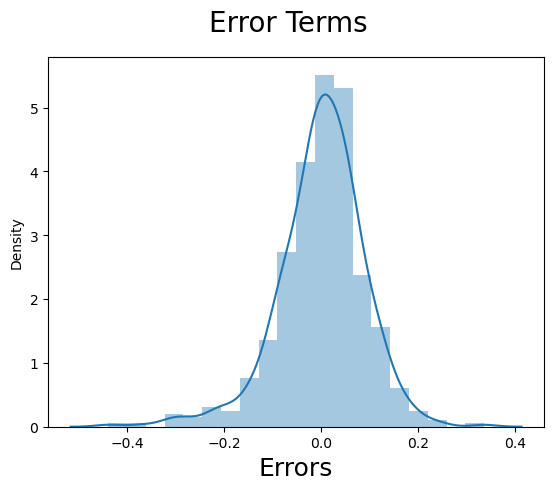

In [48]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

Text(0, 0.5, 'y_train_pred')

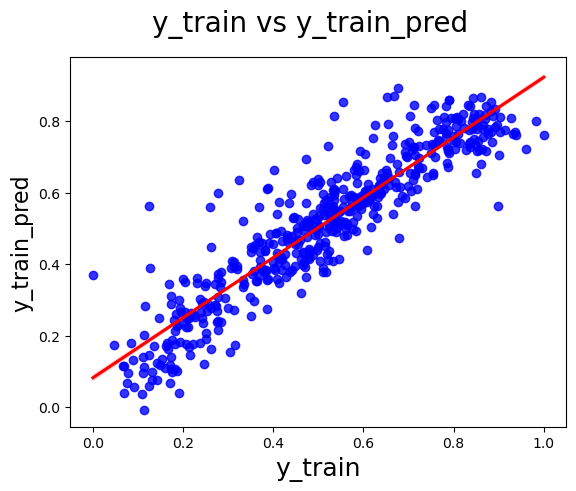

In [49]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=y_train, y=y_train_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_train vs y_train_pred', fontsize=20)
plt.xlabel('y_train', fontsize=18)
plt.ylabel('y_train_pred', fontsize=16)

### Step 7: Making Predictions Using the Final Model
#### Applying the scaling on the test sets

In [50]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,1,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,1,0,0,0,0,1,0,0


#### Dividing into X_test and y_test

In [51]:
X_train_lm2 = X_train_lm2.drop(['const'], axis = 1)

In [52]:
y_test = df_test.pop('cnt')
X_test = df_test

In [53]:
X_train_lm2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'weathersit_Clear', 'weathersit_Light_Snow'],
      dtype='object')

In [54]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm2.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
lm_test = sm.OLS(y_test,X_test_new).fit()
lm_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     83.96
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           1.59e-76
Time:                        22:36:37   Log-Likelihood:                 232.20
No. Observations:                 219   AIC:                            -434.4
Df Residuals:                     204   BIC:                            -383.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3885      0.058      6.677      0.000       0.274       0.503
yr                        0.2415      0.012     19.718      0.000       0.217       0.266
holiday                  -0.0768      0.033     -2.336      0.020      -0.142      -0.012
workingday               -0.0262      0.013     -2.013      0.045      -0.052      -0.001
temp                      0.3560      0.049      7.217      0.000       0.259       0.453
hum                      -0.1759      0.059     -2.990      0.003      -0.292      -0.060
windspeed                -0.0892      0.042     -2.122      0.035      -0.172      -0.006
season_Spring            -0.1614      0.024     -6.761      0.000      -0.209      -0.114
season_Winter             0.0956      0.020      4.759      0.000       0.056       0.135
mnth_Dec                 -0.1133      0.025     -4.590      0.000      -0.162      -0.065
mnth_Jan                 -0.0351      0.027     -1.307      0.193      -0.088       0.018
mnth_Jul                 -0.0444      0.023     -1.941      0.054      -0.089       0.001
mnth_Nov                 -0.1269      0.030     -4.295      0.000      -0.185      -0.069
weathersit_Clear          0.0384      0.017      2.260      0.025       0.005       0.072
weathersit_Light_Snow    -0.0902      0.041     -2.216      0.028      -0.170      -0.010
==============================================================================
Omnibus:                       19.334   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.903
Skew:                          -0.531   Prob(JB):                     3.21e-07
Kurtosis:                       4.466   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Making predictions using the fourth model

y_test_pred = lm_train.predict(X_test_new)

Text(0, 0.5, 'y_test_pred')

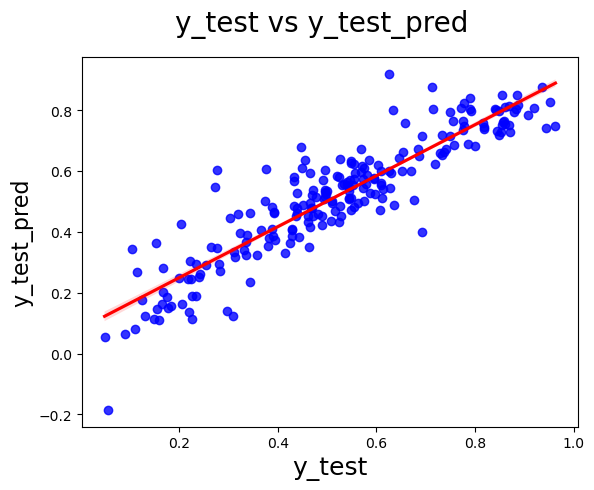

In [56]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

### Comparision between Train and Test dataset:
- Train dataset **R^2**: 0.841
- Test dataset **R^2**  : 0.852
- Train dataset **Adjusted R^2**: 0.852
- Test dataset **Adjusted R^2**  : 0.542

#### Inference: This seems to be a really good model that can very well 'Generalize' various datasets, but we also acknowledge that we could do better.

## Interepretation of results:
#### Analysing the above model, the comapany should focus on the following features:
1. Company should focus on expanding business during Spring.
2. Company should focus on expanding business during September.
3. Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
4. There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.
5. Hence when the situation comes back to normal, the company should come up with new offers during Spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.